### <center> Датасет Students містить анкетні дані студентів кількох португальських коледжів, а також їх бали з математики. </center>

In [1]:
import pandas as pd

##### Яка кількість спостережень ( samples , рядків)? Кількість ознак ( features , стовпців)? Які типи стовпців?

In [2]:
student_df = pd.read_csv('student-mat.csv')
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [3]:
student_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


##### Чи всі дані повні?

In [4]:
student_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

##### Скільки юнаків та дівчат у таблиці?

In [5]:
student_df.groupby('sex').size()

sex
F    208
M    187
dtype: int64

In [6]:
student_df['sex'].value_counts()

sex
F    208
M    187
Name: count, dtype: int64

##### Розглянемо ознаку age (вік). Яке а) мінімальне; б) максимальне; в) медіанний; г)середнє значення віку?

In [7]:
student_df['age'].agg(['min','max','mean','median'])

min       15.000000
max       22.000000
mean      16.696203
median    17.000000
Name: age, dtype: float64

In [8]:
student_df['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

##### Видаліть ознаки G1 та G2.

In [9]:
student_df.drop(['G1','G2'],axis=1,inplace=True)
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

##### Знайдіть кількість студентів, у яких професії батька (Fjob) та матері ( Mjob) збігаються.

In [10]:
student_df[student_df['Mjob']==student_df['Fjob']].shape[0]

172

##### Знайдіть середній бал студентів школи GP молодше 19 років.

In [11]:
student_df[(student_df['school'] == 'GP') & (student_df['age'] <= 19)]['G3'].mean()

10.47550432276657

##### Обчисліть медіанне значення оцінок юнаків та дівчат G 3 для кожної школи.

In [12]:
student_df.groupby(['school','sex'])['G3'].median()

school  sex
GP      F      11.0
        M      11.0
MS      F      10.0
        M      10.0
Name: G3, dtype: float64

##### Виведіть топ-5 студентів, які проживають за містом (значення R у стовпці address), за оцінками G3.

In [13]:
student_df[student_df['address']=='R'].sort_values(by = 'G3' ,ascending=False).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
374,MS,F,18,R,LE3,T,4,4,other,other,...,yes,no,5,4,4,1,1,1,0,19
293,GP,F,17,R,LE3,T,3,1,services,other,...,no,no,3,1,2,1,1,3,6,18
129,GP,M,16,R,GT3,T,4,4,teacher,teacher,...,yes,no,3,5,5,2,5,4,8,18
265,GP,M,18,R,LE3,A,3,4,other,other,...,yes,no,4,2,5,3,4,1,13,17
69,GP,F,15,R,LE3,T,3,1,other,other,...,yes,no,4,4,2,2,3,3,12,16


##### Побудуйте інфографіку залежності середнього балу (G 3) від кількості часу, що приділяється навчанню (studytime).

<Axes: xlabel='studytime'>

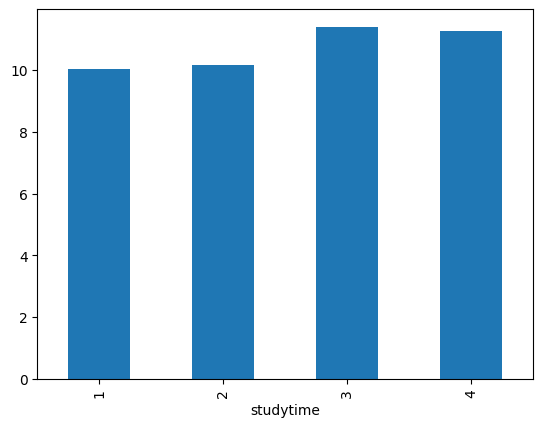

In [14]:
student_df.groupby('studytime')['G3'].mean().plot(kind='bar')

##### Відобразіть на графіку співвідношення між кількістю перепусток (absences ) та оцінкою (G3).

<Axes: xlabel='absences', ylabel='G3'>

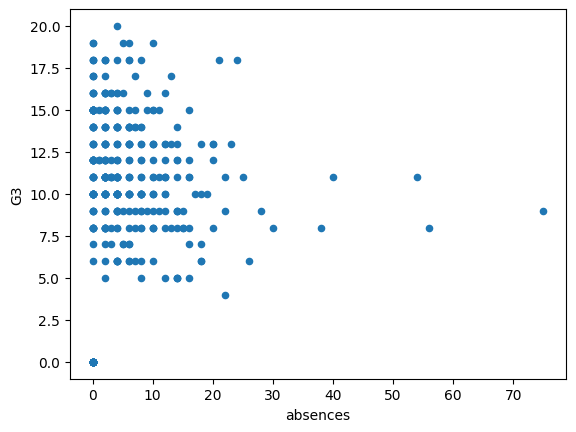

In [15]:
student_df.plot(x='absences',y='G3',kind='scatter')

##### Обчисліть коефіцієнт кореляції ( pd.Series.corr( ) ).

In [16]:
student_df['absences'].corr(student_df['G3'])

0.03424731615006931

In [17]:
student_df = student_df[(student_df['absences']<=70)&(student_df['G3']>=2)]

<Axes: xlabel='absences', ylabel='G3'>

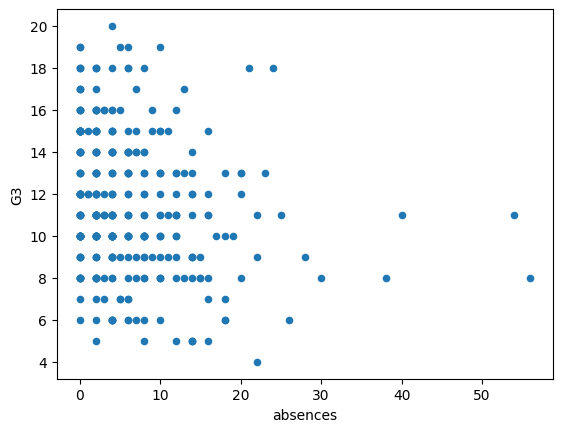

In [18]:
student_df.plot(x='absences',y='G3',kind='scatter')

In [19]:
student_df['absences'].corr(student_df['G3'])

-0.2175742190807359